# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [68]:
sinasc_raw = pd.read_csv('dados_nascimento.csv')
sinasc_raw.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [69]:
dados_extras_ro = pd.read_csv('dados_extras_ro.csv',sep=";",encoding="latin_1")

dados_extras_ro.head()

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830


In [70]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [71]:
sinasc_raw['munResLat'].describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [72]:
latitude = pd.cut(sinasc_raw['munResLat'], [-13.5,-10.5,-8.7])

In [73]:
sinasc_raw.pivot_table(values=["IDADEMAE","IDADEPAI"],
                    index=latitude,
                    aggfunc={("média","mean"),("mínimo","min"),("máximo","max"),
                             ("mediana","median"),("desvio padrão","std"),("variancia","var")})

IDADEMAE                                               
               desvio padrão mediana máximo      média mínimo  variancia   
munResLat                                                                  
(-13.5, -10.5]      6.320385    26.0     53  26.178943     12  39.947272  \
(-10.5, -8.7]       6.447663    25.0     52  26.014964     11  41.572355   

                    IDADEPAI                                              
               desvio padrão mediana máximo      média mínimo  variancia  
munResLat                                                                 
(-13.5, -10.5]      7.707002    30.0   86.0  30.903145   15.0  59.397875  
(-10.5, -8.7]       8.034214    31.0   73.0  32.126689   16.0  64.548602

In [74]:
sinasc_raw.groupby(latitude)[["IDADEMAE","IDADEPAI"]].agg({("média","mean"),("mínimo","min"),("máximo","max"),
                                                            ("mediana","median"),("desvio padrão","std"),("variancia","var")})

IDADEMAE                                                  
                variancia mínimo máximo      média desvio padrão mediana   
munResLat                                                                  
(-13.5, -10.5]  39.947272     12     53  26.178943      6.320385    26.0  \
(-10.5, -8.7]   41.572355     11     52  26.014964      6.447663    25.0   

                 IDADEPAI                                                 
                variancia mínimo máximo      média desvio padrão mediana  
munResLat                                                                 
(-13.5, -10.5]  59.397875   15.0   86.0  30.903145      7.707002    30.0  
(-10.5, -8.7]   64.548602   16.0   73.0  32.126689      8.034214    31.0

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [75]:
sinasc_raw['munResArea'].describe()

count    27027.000000
mean     14702.799767
std      13706.177751
min        459.978000
25%       3792.998000
50%       6896.648000
75%      34096.394000
max      34096.394000
Name: munResArea, dtype: float64

In [76]:
area = pd.cut(sinasc_raw['munResArea'], [459,3000,34100])

In [77]:
sinasc_raw.pivot_table(values=["IDADEMAE","IDADEPAI"],
                    index=area,
                    aggfunc={("média","mean"),("mínimo","min"),("máximo","max"),
                             ("mediana","median"),("desvio padrão","std"),("variancia","var")})

IDADEMAE                                               
              desvio padrão mediana máximo      média mínimo  variancia   
munResArea                                                                
(459, 3000]        6.305535    26.0     53  26.324775     11  39.759775  \
(3000, 34100]      6.405497    25.0     53  26.038518     12  41.030387   

                   IDADEPAI                                              
              desvio padrão mediana máximo      média mínimo  variancia  
munResArea                                                               
(459, 3000]        7.675474    30.0   69.0  31.092792   16.0  58.912900  
(3000, 34100]      7.818364    30.0   86.0  31.094014   15.0  61.126809

In [78]:
sinasc_raw.groupby(area)[["IDADEMAE","IDADEPAI"]].agg({("média","mean"),("mínimo","min"),("máximo","max"),
                                                            ("mediana","median"),("desvio padrão","std"),("variancia","var")})

IDADEMAE                                                  
               variancia mínimo máximo      média desvio padrão mediana   
munResArea                                                                
(459, 3000]    39.759775     11     53  26.324775      6.305535    26.0  \
(3000, 34100]  41.030387     12     53  26.038518      6.405497    25.0   

                IDADEPAI                                                 
               variancia mínimo máximo      média desvio padrão mediana  
munResArea                                                               
(459, 3000]    58.912900   16.0   69.0  31.092792      7.675474    30.0  
(3000, 34100]  61.126809   15.0   86.0  31.094014      7.818364    30.0

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [79]:
sinasc_raw['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [80]:
 altitude = pd.qcut(sinasc_raw['munResAlt'], 3)

In [81]:
sinasc_raw.pivot_table(values=["IDADEMAE","IDADEPAI"],
                    index=altitude,
                    aggfunc={("média","mean"),("mínimo","min"),("máximo","max"),
                             ("mediana","median"),("desvio padrão","std"),("variancia","var")})

IDADEMAE                                               
                desvio padrão mediana máximo      média mínimo  variancia   
munResAlt                                                                   
(84.999, 111.0]      6.539797    26.0     47  26.228763     12  42.768945  \
(111.0, 177.0]       6.331844    25.0     52  25.923889     11  40.092250   
(177.0, 595.0]       6.276696    26.0     53  26.146631     13  39.396917   

                     IDADEPAI                                              
                desvio padrão mediana máximo      média mínimo  variancia  
munResAlt                                                                  
(84.999, 111.0]      7.994731    32.0   73.0  32.387870   16.0  63.915728  
(111.0, 177.0]       7.815858    30.0   66.0  31.150891   15.0  61.087636  
(177.0, 595.0]       7.676821    30.0   86.0  30.825483   16.0  58.933583

In [82]:
sinasc_raw.groupby(altitude)[["IDADEMAE","IDADEPAI"]].agg({("média","mean"),("mínimo","min"),("máximo","max"),
                                                           ("mediana","median"),("desvio padrão","std"),("variancia","var")})

IDADEMAE                                                  
                 variancia mínimo máximo      média desvio padrão mediana   
munResAlt                                                                   
(84.999, 111.0]  42.768945     12     47  26.228763      6.539797    26.0  \
(111.0, 177.0]   40.092250     11     52  25.923889      6.331844    25.0   
(177.0, 595.0]   39.396917     13     53  26.146631      6.276696    26.0   

                  IDADEPAI                                                 
                 variancia mínimo máximo      média desvio padrão mediana  
munResAlt                                                                  
(84.999, 111.0]  63.915728   16.0   73.0  32.387870      7.994731    32.0  
(111.0, 177.0]   61.087636   15.0   66.0  31.150891      7.815858    30.0  
(177.0, 595.0]   58.933583   16.0   86.0  30.825483      7.676821    30.0

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [83]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

Text(0, 0.5, 'Idade da Mãe')

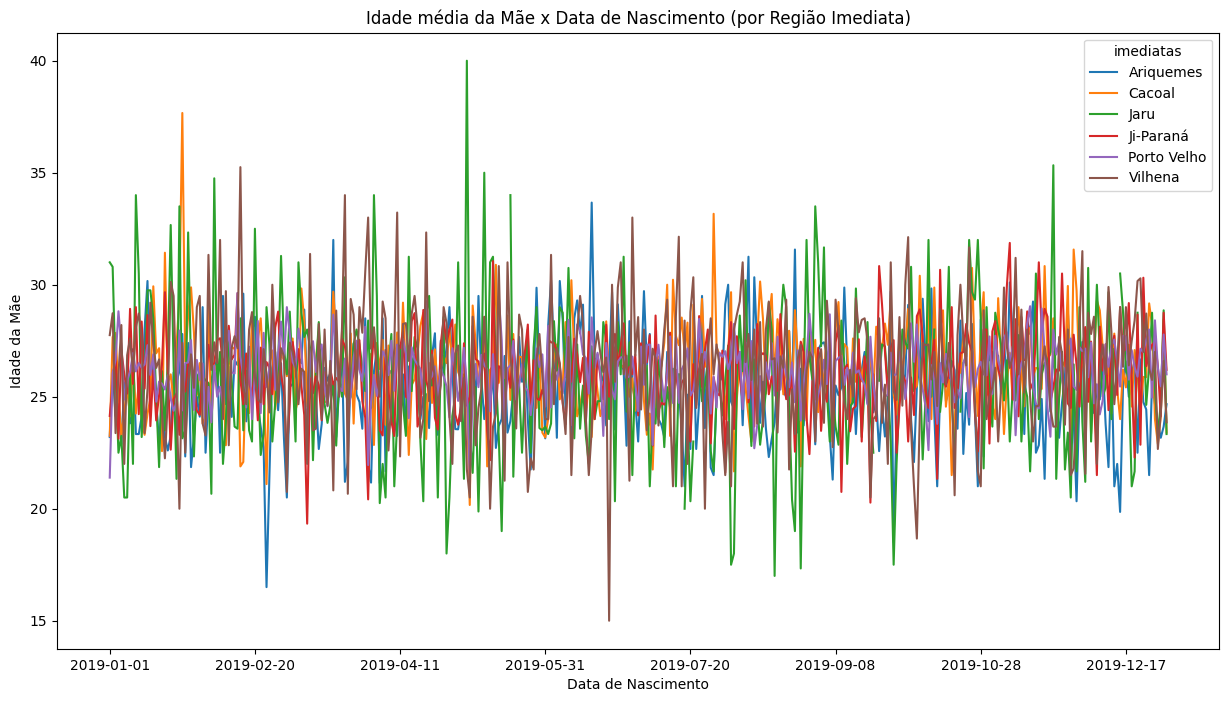

In [84]:
SIN_IMED = sinasc_raw.copy()

SIN_IMED['imediatas'] = SIN_IMED['munResNome'].map(imediatas)

SIN_IMED_grafico = SIN_IMED.groupby(['DTNASC', 'imediatas'])['IDADEMAE'].mean().unstack()

SIN_IMED_grafico.plot(figsize=(15,8))
plt.title("Idade média da Mãe x Data de Nascimento (por Região Imediata)")
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade da Mãe')


Text(0, 0.5, 'Idade da Mãe')

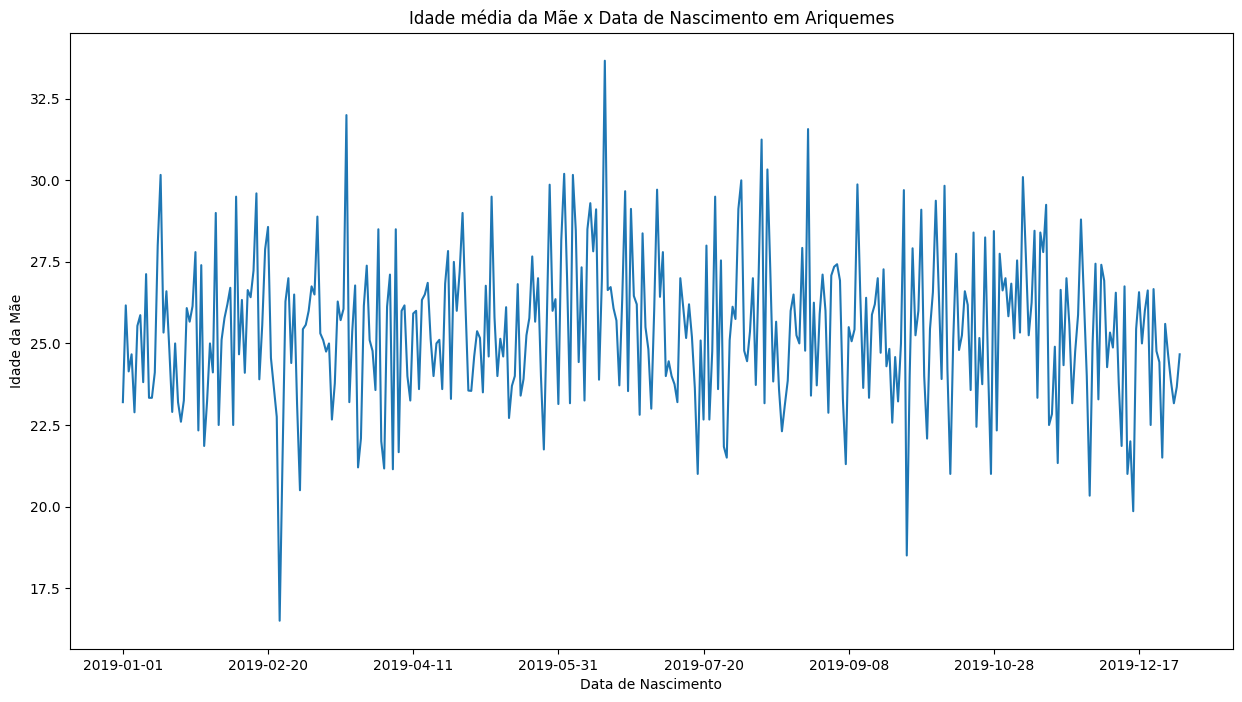

In [85]:
SIN_IMED_grafico["Ariquemes"].plot(figsize=(15,8))
plt.title("Idade média da Mãe x Data de Nascimento em Ariquemes")
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade da Mãe')

Text(0, 0.5, 'Idade da Mãe')

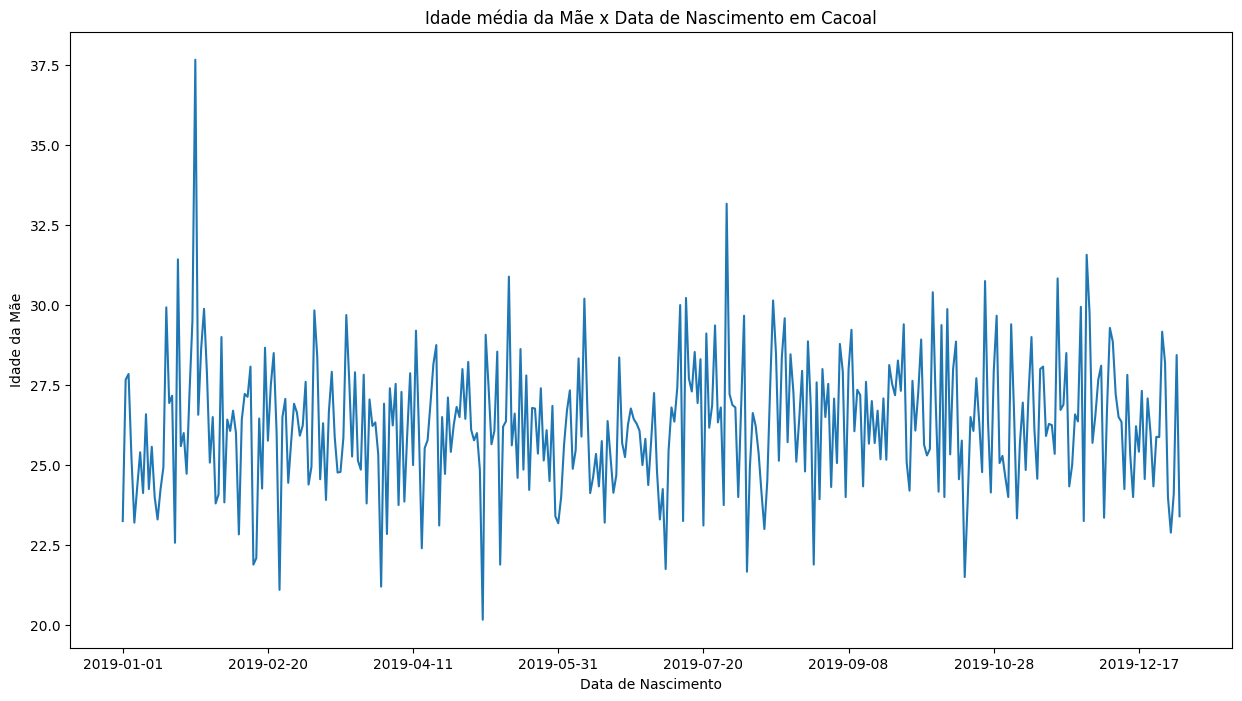

In [86]:
SIN_IMED_grafico["Cacoal"].plot(figsize=(15,8))
plt.title("Idade média da Mãe x Data de Nascimento em Cacoal")
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade da Mãe')

Text(0, 0.5, 'Idade da Mãe')

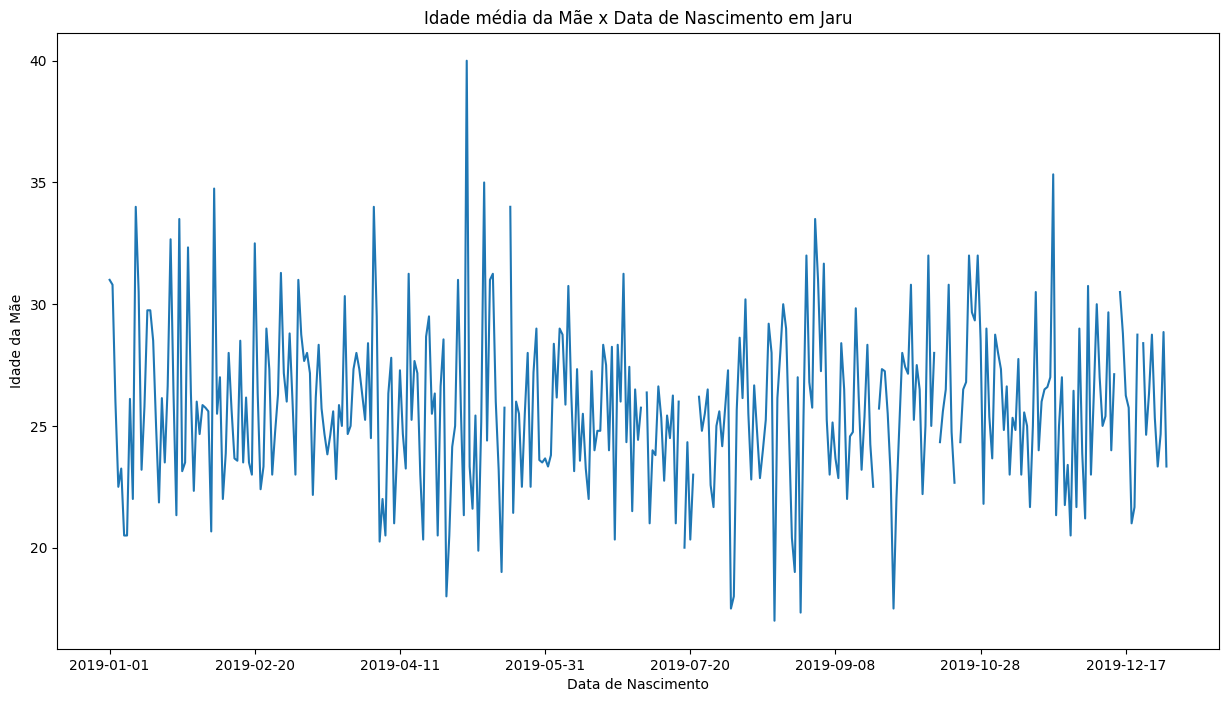

In [87]:
SIN_IMED_grafico["Jaru"].plot(figsize=(15,8))
plt.title("Idade média da Mãe x Data de Nascimento em Jaru")
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade da Mãe')

Text(0, 0.5, 'Idade da Mãe')

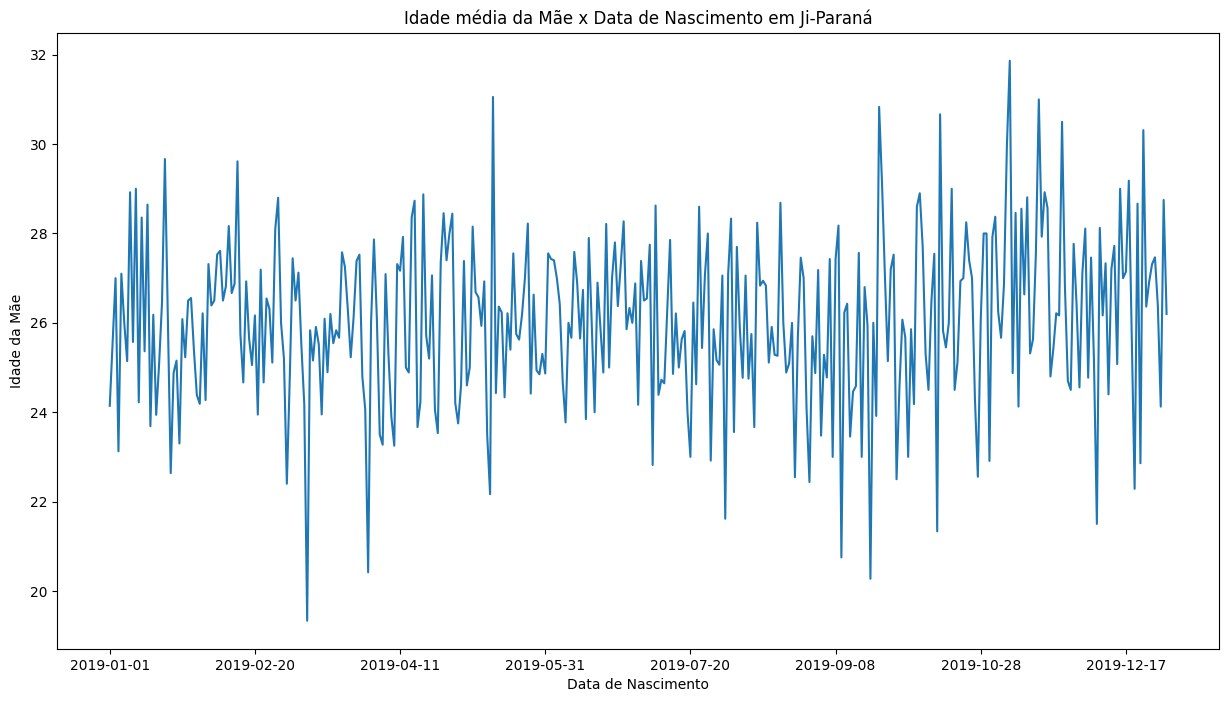

In [88]:
SIN_IMED_grafico["Ji-Paraná"].plot(figsize=(15,8))
plt.title("Idade média da Mãe x Data de Nascimento em Ji-Paraná")
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade da Mãe')

Text(0, 0.5, 'Idade da Mãe')

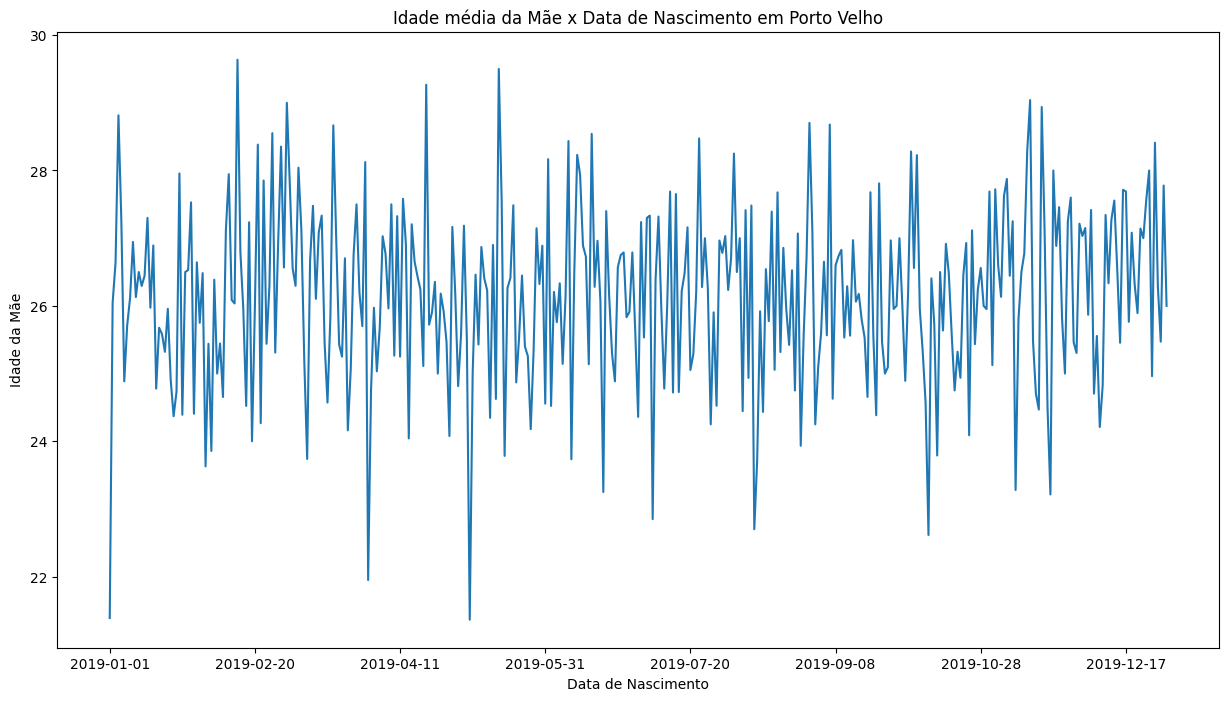

In [89]:
SIN_IMED_grafico["Porto Velho"].plot(figsize=(15,8))
plt.title("Idade média da Mãe x Data de Nascimento em Porto Velho")
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade da Mãe')

Text(0, 0.5, 'Idade da Mãe')

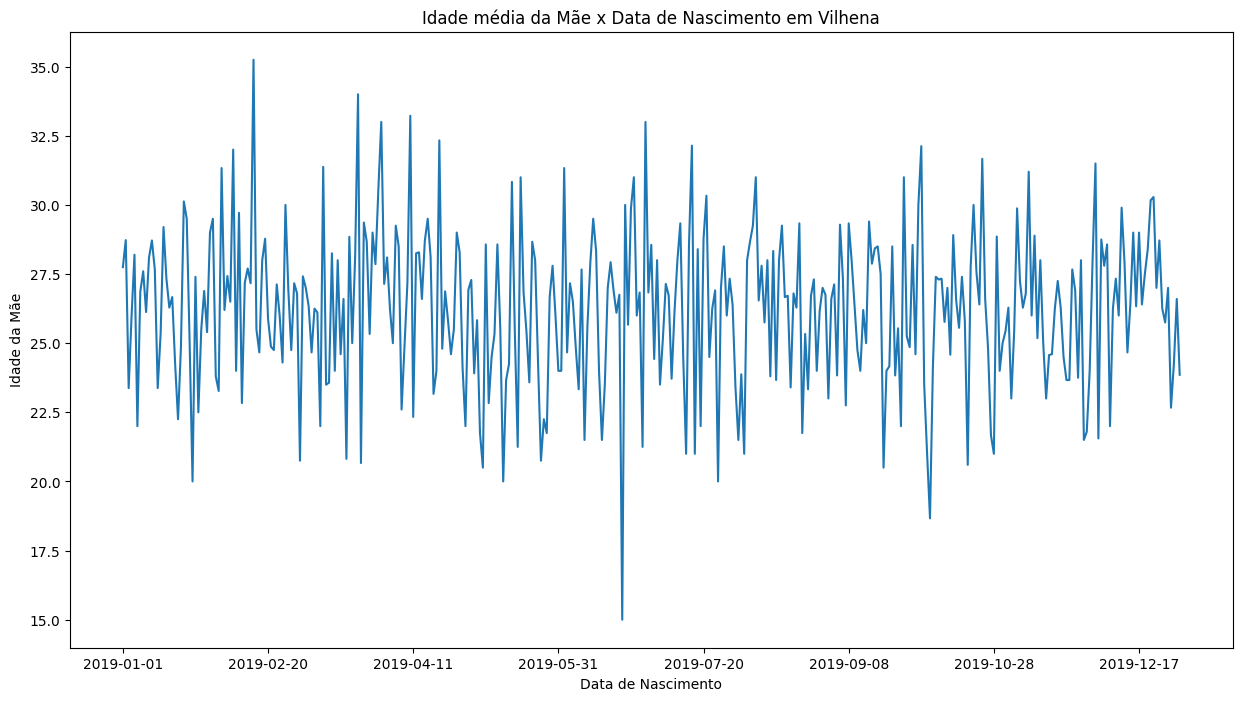

In [90]:
SIN_IMED_grafico["Vilhena"].plot(figsize=(15,8))
plt.title("Idade média da Mãe x Data de Nascimento em Vilhena")
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade da Mãe')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [91]:
IDH = pd.read_csv("IDH.csv",sep = ";",encoding="latin_1")
IDH.head()

,cidade,IDH
0,Porto Velho,0.736
1,Vilhena,0.731
2,Cacoal,0.718
3,Ji-Paraná,0.714
4,Pimenta Bueno,0.710


In [92]:
faixas = {

   'baixo': (0, 0.550),

   'médio': (0.551, 0.699),

   'alto': (0.700, 0.799),

   'muito alto': (0.800, 1.000)

}

In [93]:
def categorizar_idh(idh):

   for categoria, (min_val, max_val) in faixas.items():

       if min_val <= idh <= max_val:

           return categoria

   return None

In [94]:
IDH['Categoria'] = IDH['IDH'].apply(categorizar_idh)

In [95]:
IDH_categorizado = IDH.groupby(faixas)

In [96]:
print(IDH)
print(IDH_categorizado)

                       cidade    IDH Categoria
0                 Porto Velho  0.736      alto
1                     Vilhena  0.731      alto
2                      Cacoal  0.718      alto
3                   Ji-Paraná  0.714      alto
4               Pimenta Bueno  0.710      alto
5                   Ariquemes  0.702      alto
6              Rolim de Moura  0.700      alto
7                  Cerejeiras  0.692     médio
8                        Jaru  0.689     médio
9           Colorado do Oeste  0.685     médio
10        Ouro Preto do Oeste  0.682     médio
11            Espigão d'Oeste  0.672     médio
12        Santa Luzia d'Oeste  0.670     médio
13       Pimenteiras do Oeste  0.665     médio
14          Presidente Médici  0.664     médio
15               Castanheiras  0.658     médio
16              Guajará-Mirim  0.657     médio
17                Chupinguaia  0.652     médio
18                     Cabixi  0.650     médio
19         Candeias do Jamari  0.649     médio
20         Sã

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [97]:
IFDM = pd.read_csv("IFDM.csv",sep = ";",encoding="latin_1")
IFDM.head()

,cidade,IDH
0,Ariquemes,0.7746
1,Vilhena,0.7465
2,Pimenta Bueno,0.7383
3,Porto Velho,0.7257
4,Ji-Paraná,0.7117


In [98]:
IFDM.rename(columns={"IDH":"IFDM"},inplace=True)

In [99]:
faixas = {

   'baixo': (0, 0.3999),

   'regular': (0.4, 0.5999),

   'moderado': (0.6, 0.8),

   'alto': (0.8001, 1)

}

In [100]:
def categorizar_ifdm(ifdm):

   for categoria, (min_val, max_val) in faixas.items():

       if min_val <= ifdm <= max_val:

           return categoria

   return None

In [101]:
IFDM['Categoria'] = IFDM['IFDM'].apply(categorizar_ifdm)

In [102]:
IFDM_categorizado = IFDM.groupby(faixas)

In [103]:
print(IFDM)
print(IFDM_categorizado)

                       cidade    IFDM Categoria
0                   Ariquemes  0.7746  moderado
1                     Vilhena  0.7465  moderado
2               Pimenta Bueno  0.7383  moderado
3                 Porto Velho  0.7257  moderado
4                   Ji-Paraná  0.7117  moderado
5                      Cacoal  0.7111  moderado
6         Santa Luzia d'Oeste  0.6850  moderado
7              Rolim de Moura  0.6785  moderado
8                 Chupinguaia  0.6766  moderado
9       São Miguel do Guaporé  0.6699  moderado
10       Pimenteiras do Oeste  0.6501  moderado
11              Teixeirópolis  0.6500  moderado
12          Colorado do Oeste  0.6473  moderado
13                       Jaru  0.6450  moderado
14                 Rio Crespo  0.6430  moderado
15      Primavera de Rondônia  0.6384  moderado
16      Alta Floresta d'Oeste  0.6337  moderado
17        Ouro Preto do Oeste  0.6261  moderado
18   São Francisco do Guaporé  0.6214  moderado
19         Candeias do Jamari  0.6199  m

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [104]:
PIB = pd.read_csv("PIB.csv",sep = ";",encoding="latin_1")
PIB.head()

,cidade,PIB
0,Porto Velho,17912070
1,Ji-Paraná,3783972
2,Vilhena,2831175
3,Ariquemes,2579830
4,Cacoal,2261644


In [105]:
faixas = {

   'Acima de 1 bilhão': 1000000,

   'Acima de 500 milhões': 500000 ,

   'Acima de 300 milhões': 300000,

   'Acima de 200 milhões': 200000,

   'Acima de 100 milhões' : 100000,

   'Até 100 milhões' : 0

}

In [106]:
def categorizar_PIB(pib):

   for categoria, v in faixas.items():

       if pib > v:

           return categoria

   return None

In [107]:
PIB['Categoria'] = PIB['PIB'].apply(categorizar_PIB)

In [108]:
PIB_categorizado = PIB.groupby(faixas)

In [109]:
print(PIB)
print(PIB_categorizado)

                        cidade       PIB             Categoria
0                  Porto Velho  17912070     Acima de 1 bilhão
1                    Ji-Paraná   3783972     Acima de 1 bilhão
2                      Vilhena   2831175     Acima de 1 bilhão
3                    Ariquemes   2579830     Acima de 1 bilhão
4                       Cacoal   2261644     Acima de 1 bilhão
5                         Jaru   1500890     Acima de 1 bilhão
6               Rolim de Moura   1283434     Acima de 1 bilhão
7                Pimenta Bueno   1164877     Acima de 1 bilhão
8                Guajará-Mirim    893000  Acima de 500 milhões
9          Ouro Preto do Oeste    834000  Acima de 500 milhões
10                     Buritis    726000  Acima de 500 milhões
11         Machadinho do Oeste    633000  Acima de 500 milhões
12             Espigão d'Oeste    625000  Acima de 500 milhões
13       São Miguel do Guaporé    616000  Acima de 500 milhões
14          Candeias do Jamari    548000  Acima de 500 

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

descobri que teve uma data em que a media da idade das maes era menor que 18 anos em Ariquemes e chegou a ser 15 em Vilhena